# Cluster Review EDA

Quick exploration of the clustered review snippets produced by the pipeline.

In [7]:
from pathlib import Path
import json
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')


In [11]:
def find_project_root(marker: str = "artifacts/clusters") -> Path:
    current = Path.cwd().resolve()
    marker_path = Path(marker)
    while True:
        print(current / marker_path)
        if (current / marker_path).exists():
            return current / marker_path
        if current.parent == current:
            raise FileNotFoundError(f"Could not find '{marker}' by walking up from {Path.cwd()}")
        current = current.parent

cluster_dir = find_project_root()
print(cluster_dir)
components_path = cluster_dir / 'components.json'

if not components_path.exists():
    raise FileNotFoundError(f'Could not find {components_path}')

components = json.loads(components_path.read_text())
counts = np.array(components.get('counts') or [])
top_terms = components.get('top_terms') or []

print(f'Total clusters: {len(counts)}')
print(f'Total review snippets: {counts.sum():,}')
print(f'Min: {counts.min()}  Median: {np.median(counts):.0f}  Mean: {counts.mean():.1f}  Max: {counts.max()}')


/Users/chaayagirimon/Shelf/thesis/tourism-rag/nlp/artifacts/clusters
/Users/chaayagirimon/Shelf/thesis/tourism-rag/artifacts/clusters
/Users/chaayagirimon/Shelf/thesis/tourism-rag/artifacts/clusters
Total clusters: 64
Total review snippets: 117,129
Min: 152  Median: 1856  Mean: 1830.1  Max: 5037


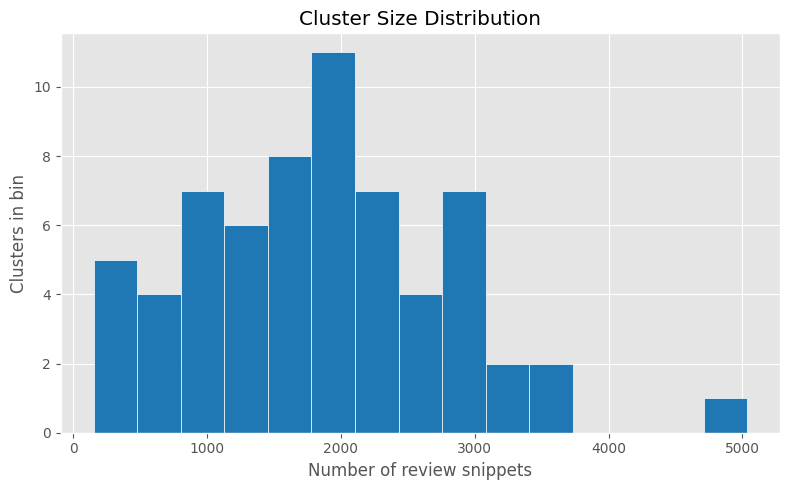

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(counts, bins=min(15, len(counts) // 2 or 1), color='#1f77b4', edgecolor='white')
ax.set_title('Cluster Size Distribution')
ax.set_xlabel('Number of review snippets')
ax.set_ylabel('Clusters in bin')
fig.tight_layout()
plt.show()


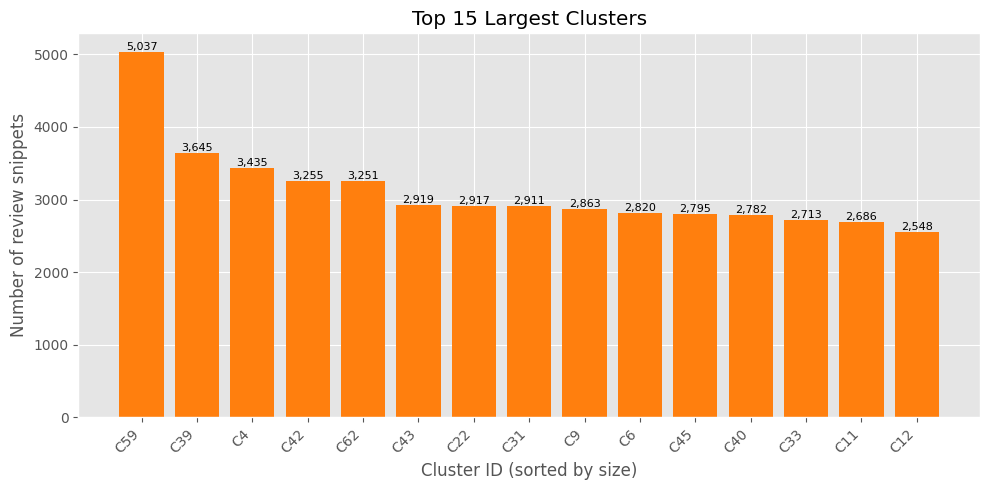

In [13]:
top_k = 15
order = np.argsort(counts)[::-1][:top_k]
labels = [f'C{i}' for i in order]
values = counts[order]

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(labels, values, color='#ff7f0e')
ax.set_title(f'Top {len(order)} Largest Clusters')
ax.set_xlabel('Cluster ID (sorted by size)')
ax.set_ylabel('Number of review snippets')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
for rect, value in zip(bars, values):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), f'{int(value):,}',
            ha='center', va='bottom', fontsize=8)
fig.tight_layout()
plt.show()


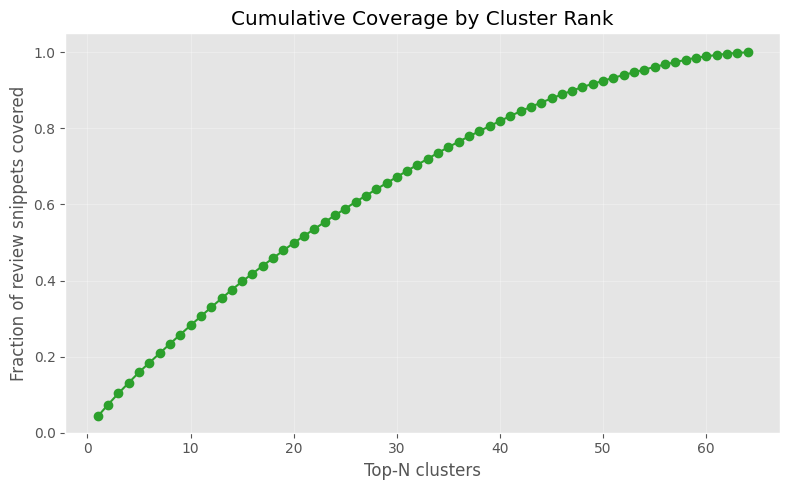

In [14]:
sorted_counts = np.sort(counts)[::-1]
cumulative = np.cumsum(sorted_counts) / sorted_counts.sum()

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(range(1, len(cumulative) + 1), cumulative, marker='o', color='#2ca02c')
ax.set_title('Cumulative Coverage by Cluster Rank')
ax.set_xlabel('Top-N clusters')
ax.set_ylabel('Fraction of review snippets covered')
ax.set_ylim(0, 1.05)
ax.grid(alpha=0.3)
fig.tight_layout()
plt.show()


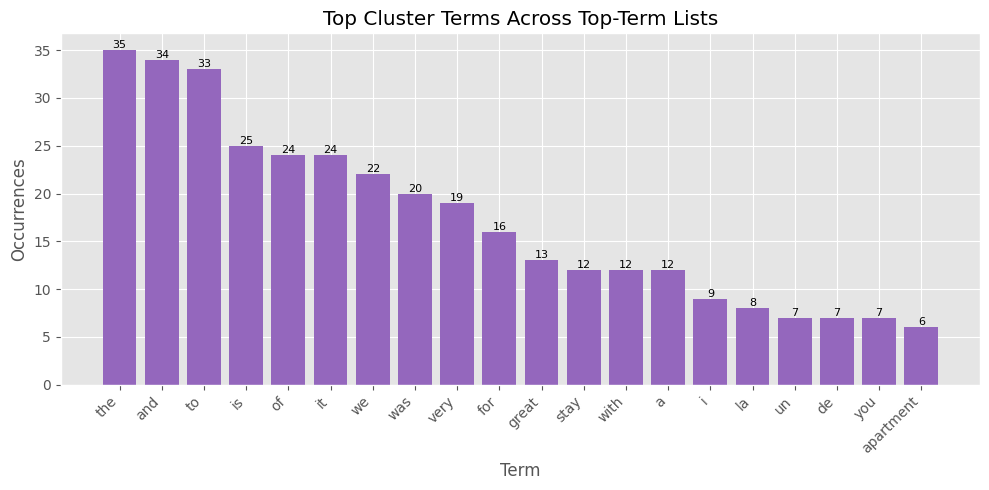

In [15]:
most_common = Counter(term.lower() for terms in top_terms for term in terms).most_common(20)
labels = [term for term, _ in most_common]
values = [count for _, count in most_common]

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(labels, values, color='#9467bd')
ax.set_title('Top Cluster Terms Across Top-Term Lists')
ax.set_xlabel('Term')
ax.set_ylabel('Occurrences')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
for rect, value in zip(bars, values):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), str(value),
            ha='center', va='bottom', fontsize=8)
fig.tight_layout()
plt.show()
